# 『 การพยากรณ์ปริมาณการผลิตเงาะในประเทศไทย โดยเทียบกับปริมาณน้ำฝน พื้นที่เพาะปลูกต่อไร่ และผลผลิตต่อไร่ 2561-2562(2018-2019) ที่มีผลกระทบ 』

# Github file Dataset

> [Datasets](https://github.com/S0ngSTK/Dataset_Final)


# 1.เตรียมข้อมูล

ResouceDataset From website https://digi.data.go.th/showcase/thailand-rainfall-data/

## ปริมาณน้ำฝนในประเทศไทยตั้งปี พ.ศ.2561(2018) - พ.ศ.2565(2022)
## มี column ทั้งหมด 11 column

1.ProvinceID รหัสของแต่ละจังหวัด

2.ProvinceName  ชื่อจังหวัด

3.ProvinceName 2  ชื่อจังหวัดภาษาอังกฤษ

4.MinRain ปริมาณน้ำฝนที่น้อยที่สุดต่อเดือน

5.MaxRain ปริมาณน้ำฝนที่มากที่สุดต่อเดือน

6.AvgRain  ค่าเฉลี่ยของปริมาณน้ำฝนต่อเดือน

7.region  ภูมิภาคของจังหวัด

8.Year ปี

9Month เดือนตัวเลข

10Date  วันที่

11Month_TH เดือนภาษาไทย


In [925]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
def find_error(name_model,y_test,y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    print("Mean absolute Error (MAE):", mae)
    mse = mean_squared_error(y_test, y_pred)  # Replace y_test with your actual target values
    print("Mean Squared Error (MSE):", mse)
    r2 = r2_score(y_test, y_pred)  # Replace y_test with your actual target values
    print("R-squared (R2):", r2)
    S = {name_model : [{'mse' : mse},{"R2": r2},{"mae" :mae}]}
    return S

In [926]:
import pandas as pd
rainfall = pd.read_csv('https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/Rainfall.csv')
rainfall.iloc[0]

ProvinceID                   10
ProvinceName      กรุงเทพมหานคร
ProvinceName 2          Bangkok
MinRain               54.299999
MaxRain              257.230011
AvgRain              142.119137
region                     กลาง
Year                       2018
Month                         1
Date                     1/1/18
Month_TH                 มกราคม
Name: 0, dtype: object

## ข้อมูลแบ่งเป็นเดือนๆ

In [927]:
rainfall

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4230,92,ตรัง,Trang,158.050003,433.649994,293.423136,ใต้,2022,7,1/7/22,กรกฎาคม
4231,93,พัทลุง,Phatthalung,101.309998,264.140015,144.777569,ใต้,2022,7,1/7/22,กรกฎาคม
4232,94,ปัตตานี,Pattani,127.589996,214.440002,172.280939,ใต้,2022,7,1/7/22,กรกฎาคม
4233,95,ยะลา,Yala,122.440002,189.169998,148.495964,ใต้,2022,7,1/7/22,กรกฎาคม


In [928]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


## ทำการเลือกปริมาณน้ำฝนเฉพาะปี 2018-2019

In [929]:
rainfall_2018_2019 = rainfall[(rainfall['Year'] >= 2018) & (rainfall['Year'] <= 2019) & (rainfall['region'] == "ใต้") | (rainfall['region'] == "เหนือ")]

In [930]:
rainfall_2018_2019

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
38,50,เชียงใหม่,Chiang Mai,0.300000,30.400000,6.695410,เหนือ,2018,1,1/1/18,มกราคม
39,51,ลำพูน,Lamphun,0.000000,8.080000,4.250428,เหนือ,2018,1,1/1/18,มกราคม
40,52,ลำปาง,Lampang,0.020000,25.389999,10.404033,เหนือ,2018,1,1/1/18,มกราคม
41,53,อุตรดิตถ์,Uttaradit,3.390000,21.010000,12.157003,เหนือ,2018,1,1/1/18,มกราคม
42,54,แพร่,Phrae,8.220000,23.799999,17.963425,เหนือ,2018,1,1/1/18,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4200,54,แพร่,Phrae,192.289993,241.770004,214.466557,เหนือ,2022,7,1/7/22,กรกฎาคม
4201,55,น่าน,Nan,219.470001,392.750000,271.317010,เหนือ,2022,7,1/7/22,กรกฎาคม
4202,56,พะเยา,Phayao,127.949997,315.820007,225.731177,เหนือ,2022,7,1/7/22,กรกฎาคม
4203,57,เชียงราย,Chiang Rai,173.320007,472.239990,328.444047,เหนือ,2022,7,1/7/22,กรกฎาคม


ตรวจสอบค่า Missing 

In [931]:
rainfall_2018_2019.isnull().sum()

ProvinceID        0
ProvinceName      0
ProvinceName 2    0
MinRain           0
MaxRain           0
AvgRain           0
region            0
Year              0
Month             0
Date              0
Month_TH          0
dtype: int64

ไม่มีค่า Missing

In [932]:
rainfall_2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 38 to 4204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      831 non-null    int64  
 1   ProvinceName    831 non-null    object 
 2   ProvinceName 2  831 non-null    object 
 3   MinRain         831 non-null    float64
 4   MaxRain         831 non-null    float64
 5   AvgRain         831 non-null    float64
 6   region          831 non-null    object 
 7   Year            831 non-null    int64  
 8   Month           831 non-null    int64  
 9   Date            831 non-null    object 
 10  Month_TH        831 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 77.9+ KB


## ทำการรวมข้อมูลของแต่ละเดือนให้กลายเป็นปีโดยใช้ Groupby

In [933]:
grouped_rainfall = rainfall_2018_2019.groupby(['Year','ProvinceID','ProvinceName'])['AvgRain'].sum().reset_index()
grouped_rainfall

,Year,ProvinceID,ProvinceName,AvgRain
0,2018,50,เชียงใหม่,1328.250929
1,2018,51,ลำพูน,1121.173469
2,2018,52,ลำปาง,1178.757342
3,2018,53,อุตรดิตถ์,1143.301542
4,2018,54,แพร่,1123.688815
...,...,...,...,...
68,2022,54,แพร่,773.095890
69,2022,55,น่าน,923.256026
70,2022,56,พะเยา,929.508234
71,2022,57,เชียงราย,1039.474919


## นำเข้าข้อมูลเงาะปี 2018
สำนักงานเศรษฐกิจการเกรษตร

ResouceDataset From website https://mis-app.oae.go.th/
เกี่ยวกับข้อมูล

In [934]:
rambutan_products_2018 = pd.read_csv('https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/rambutan_2018.csv')

# Apply conversion function to specified columns
rambutan_products_2018["ผลผลิต(ตัน)"] = rambutan_products_2018["ผลผลิต(ตัน)"].str.replace(',', '').astype(float)
rambutan_products_2018["เนื้อที่เก็บเกี่ยว(ไร่)"] = rambutan_products_2018["เนื้อที่เก็บเกี่ยว(ไร่)"].str.replace(',', '').astype(float)
rambutan_products_2018["ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)"] = rambutan_products_2018["ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)"].str.replace(',', '').astype(float)


In [935]:
rambutan_products_2018.rename(columns={"จังหวัด" : "ProvinceName"},inplace=True)

In [936]:
rambutan_products_2018

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year
0,จันทบุรี,85915.0,33%,55455.0,1549.27,2018
1,ตราด,76181.0,29%,49021.0,1554.05,2018
2,สุราษฎร์ธานี,38794.0,15%,29206.0,1328.29,2018
3,นราธิวาส,12991.0,5%,24057.0,540.01,2018
4,ระยอง,11128.0,4%,7438.0,1496.10,2018
5,นครศรีธรรมราช,7437.0,3%,12889.0,577.00,2018
6,เชียงราย,4247.0,2%,5962.0,712.34,2018
7,พังงา,3291.0,1%,5228.0,629.50,2018
8,ศรีสะเกษ,2602.0,1%,1762.0,1476.73,2018
9,พัทลุง,1800.0,1%,4915.0,366.23,2018


In [937]:
rambutan_products_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ProvinceName                      42 non-null     object 
 1   ผลผลิต(ตัน)                       42 non-null     float64
 2   สัดส่วน                           42 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           42 non-null     float64
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  42 non-null     float64
 5   Year                              42 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.1+ KB


In [938]:
rambutan_products_2018.shape

(42, 6)

## นำเข้าข้อมูลเงาะปี 2019

https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/rambutan_2019.csv

In [939]:
rambutan_products_2019 = pd.read_csv('https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/rambutan_2019.csv')

In [940]:
rambutan_products_2019

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year
0,จันทบุรี,96326,0.3440,54757,1759.15,2019
1,ตราด,86886,0.3103,49331,1761.29,2019
2,สุราษฎร์ธานี,37819,0.1351,26116,1448.12,2019
3,นราธิวาส,12185,0.0435,17564,693.75,2019
4,ระยอง,7877,0.0281,5108,1542.09,2019
5,นครศรีธรรมราช,7586,0.0271,12110,626.42,2019
6,เชียงราย,3777,0.0135,5986,630.97,2019
7,พังงา,2629,0.0094,3791,693.48,2019
8,น่าน,2424,0.0087,6803,356.31,2019
9,ศรีสะเกษ,2202,0.0079,1840,1196.74,2019


In [941]:
rambutan_products_2019.shape

(42, 6)

## ข้อมูลความชื้น
> resource: (กรมอุทยานแห่งชาติ สัตว์ป่า และพันธุ์พืช): Download 
ความชื้นสัมพัทธ์เฉลี่ย 2561-2562

http://it2.dnp.go.th/wp-content/uploads/%E0%B8%95%E0%B8%B2%E0%B8%A3%E0%B8%B2%E0%B8%87-31-%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B8%8A%E0%B8%B7%E0%B9%89%E0%B8%99%E0%B8%AA%E0%B8%B1%E0%B8%A1%E0%B8%9E%E0%B8%B1%E0%B8%97%E0%B8%98%E0%B9%8C-%E0%B8%9B%E0%B8%B5-2561-2562.pdf
## เกี่ยวกับข้อมูล
ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ
*   ProvinceName: ชื่อจังหวัด
*   2018_Humidity: ค่าความชื้นปี 2018
*   2019_Humidity: ค่าความชิ้นปี 2019


In [942]:
humidity = pd.read_csv("https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/Humidity.csv")

In [943]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProvinceName   67 non-null     object 
 1   2019_Humidity  67 non-null     float64
 2   2018_Humidity  67 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


# ต่อตารางเงาะแต่ละปีเข้ากับความชื้น


In [944]:
rambutan_products_2019_humidity = rambutan_products_2019.merge(humidity[['ProvinceName', '2019_Humidity']],on=["ProvinceName"])

In [945]:
rambutan_products_2019_humidity

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year,2019_Humidity
0,จันทบุรี,96326,0.3440,54757,1759.15,2019,77.6
1,ตราด,86886,0.3103,49331,1761.29,2019,81.0
2,สุราษฎร์ธานี,37819,0.1351,26116,1448.12,2019,82.9
3,นราธิวาส,12185,0.0435,17564,693.75,2019,77.5
4,ระยอง,7877,0.0281,5108,1542.09,2019,76.9
5,นครศรีธรรมราช,7586,0.0271,12110,626.42,2019,81.4
6,เชียงราย,3777,0.0135,5986,630.97,2019,70.2
7,น่าน,2424,0.0087,6803,356.31,2019,72.5
8,ศรีสะเกษ,2202,0.0079,1840,1196.74,2019,73.4
9,ชุมพร,2164,0.0077,2589,835.84,2019,80.9


In [946]:
rambutan_products_2018_humidity = rambutan_products_2018.merge(humidity[['ProvinceName', '2018_Humidity']],on=["ProvinceName"])

In [947]:
rambutan_products_2018_humidity

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year,2018_Humidity
0,จันทบุรี,85915.0,33%,55455.0,1549.27,2018,81.6
1,ตราด,76181.0,29%,49021.0,1554.05,2018,74.9
2,สุราษฎร์ธานี,38794.0,15%,29206.0,1328.29,2018,70.0
3,นราธิวาส,12991.0,5%,24057.0,540.01,2018,819.0
4,ระยอง,11128.0,4%,7438.0,1496.10,2018,81.3
5,นครศรีธรรมราช,7437.0,3%,12889.0,577.00,2018,81.4
6,เชียงราย,4247.0,2%,5962.0,712.34,2018,78.0
7,ศรีสะเกษ,2602.0,1%,1762.0,1476.73,2018,74.3
8,พัทลุง,1800.0,1%,4915.0,366.23,2018,76.5
9,สงขลา,1678.0,1%,3803.0,441.23,2018,79.8


In [948]:
rambutan_products_2019_humidity.rename(columns={"2019_Humidity" : "Humidity"},inplace=True)
rambutan_products_2018_humidity.rename(columns={"2018_Humidity" : "Humidity"},inplace=True)


In [949]:
rambutan_products_2018_humidity

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year,Humidity
0,จันทบุรี,85915.0,33%,55455.0,1549.27,2018,81.6
1,ตราด,76181.0,29%,49021.0,1554.05,2018,74.9
2,สุราษฎร์ธานี,38794.0,15%,29206.0,1328.29,2018,70.0
3,นราธิวาส,12991.0,5%,24057.0,540.01,2018,819.0
4,ระยอง,11128.0,4%,7438.0,1496.10,2018,81.3
5,นครศรีธรรมราช,7437.0,3%,12889.0,577.00,2018,81.4
6,เชียงราย,4247.0,2%,5962.0,712.34,2018,78.0
7,ศรีสะเกษ,2602.0,1%,1762.0,1476.73,2018,74.3
8,พัทลุง,1800.0,1%,4915.0,366.23,2018,76.5
9,สงขลา,1678.0,1%,3803.0,441.23,2018,79.8


# ต่อตารางเงาะสองปีเข้าด้วยกัน

In [950]:
merged_rambutan = pd.concat([rambutan_products_2019_humidity,rambutan_products_2018_humidity],ignore_index=True)

In [951]:
merged_rambutan

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year,Humidity
0,จันทบุรี,96326.0,0.344,54757.0,1759.15,2019,77.6
1,ตราด,86886.0,0.3103,49331.0,1761.29,2019,81.0
2,สุราษฎร์ธานี,37819.0,0.1351,26116.0,1448.12,2019,82.9
3,นราธิวาส,12185.0,0.0435,17564.0,693.75,2019,77.5
4,ระยอง,7877.0,0.0281,5108.0,1542.09,2019,76.9
...,...,...,...,...,...,...,...
73,เพชรบูรณ์,48.0,0%,56.0,857.14,2018,74.2
74,หนองบัวลำภู,38.0,0%,24.0,1583.33,2018,75.6
75,แม่ฮ่องสอน,37.0,0%,94.0,393.62,2018,77.0
76,ชลบุรี,20.0,0%,32.0,625.00,2018,82.8


## ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ
> resource: (สำนักงานพัฒนารัฐบาลดิจิทัล (องค์การมหาชน) (สพร.), data.go.th): https://data.go.th/th/dataset/tmax-tmin

## เกี่ยวกับข้อมูล
ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ
*   id: ลำดับข้อมูล
*   Year: ปีที่บันทึกข้อมูลอุณหภูมิ
*   Month: ลำดับที่ของเดือน
*   ProvinceID: รหัสจังหวัด
*   ProvinceName: ชื่อจังหวัด
*   Tmax: อุณหภูมิสูงสุด
*   Tmin: อุณหภูมิต่ำสุด

In [952]:
temp = pd.read_csv("https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/tmax-tmin.csv")
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4550 non-null   int64  
 1   Month         4550 non-null   int64  
 2   ProvinceID    4550 non-null   int64  
 3   ProvinceName  4550 non-null   object 
 4   Tmax          4550 non-null   float64
 5   Tmin          4525 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 213.4+ KB


In [953]:
temp.isnull().sum()

Year             0
Month            0
ProvinceID       0
ProvinceName     0
Tmax             0
Tmin            25
dtype: int64

In [954]:
temp_min_mean = temp['Tmin'].mean()
temp["Tmin"].fillna(temp_min_mean,inplace=True)
temp.isnull().sum()

Year            0
Month           0
ProvinceID      0
ProvinceName    0
Tmax            0
Tmin            0
dtype: int64

In [955]:
temp["Tavg"] = (temp['Tmax'] + temp['Tmin']) / 2
temp

,Year,Month,ProvinceID,ProvinceName,Tmax,Tmin,Tavg
0,2018,1,10,กรุงเทพมหานคร,35.5,18.0,26.75
1,2018,1,11,สมุทรปราการ,36.0,18.4,27.20
2,2018,1,13,ปทุมธานี,35.6,18.0,26.80
3,2018,1,14,พระนครศรีอยุธยา,35.5,15.4,25.45
4,2018,1,16,ลพบุรี,36.2,14.7,25.45
...,...,...,...,...,...,...,...
4545,2023,10,92,ตรัง,35.0,24.0,29.50
4546,2023,10,93,พัทลุง,34.8,23.5,29.15
4547,2023,10,94,ปัตตานี,34.6,23.2,28.90
4548,2023,10,95,ยะลา,35.4,23.0,29.20


In [956]:
temp_2020_2019 = temp[(temp["Year"] >= 2018) & (temp["Year"] <=2019)]
temp_comple = temp_2020_2019.groupby(['Year','ProvinceID','ProvinceName'])['Tavg'].sum().reset_index()
temp_comple["Tavg"] = temp_comple['Tavg']/12
temp_comple


,Year,ProvinceID,ProvinceName,Tavg
0,2018,10,กรุงเทพมหานคร,29.050000
1,2018,11,สมุทรปราการ,28.275000
2,2018,13,ปทุมธานี,29.800000
3,2018,14,พระนครศรีอยุธยา,28.058333
4,2018,16,ลพบุรี,28.279167
...,...,...,...,...
126,2019,92,ตรัง,28.929167
127,2019,93,พัทลุง,29.158333
128,2019,94,ปัตตานี,28.750000
129,2019,95,ยะลา,28.495833


<!-- # ข้อมูลระดับปริมาณน้ำ
> resource: (องค์กร : สถาบันสารสนเทศทรัพยากรน้ำ (องค์การมหาชน)): https://data.go.th/dataset/set-of-water-level-by-station

## เกี่ยวกับข้อมูล
* code: รหัสหรือตัวระบุที่เกี่ยวข้องกับคุณลักษณะทางภูมิศาสตร์แต่ละอย่าง
* geocode: อาจเป็นรหัสหรือตัวระบุอื่นสำหรับคุณลักษณะทางภูมิศาสตร์
* name: สถานีการตรวจวัด
* lat: พิกัดละติจูดของคุณลักษณะทางภูมิศาสตร์
* lng: พิกัดลองจิจูดของคุณลักษณะทางภูมิศาสตร์
* prov_id: รหัสจังหวัดหรือรหัสที่มีลักษณะทางภูมิศาสตร์ตั้งอยู่
* tambon_name: ชื่อตำบลหรือตำบลที่มีลักษณะทางภูมิศาสตร์ตั้งอยู่
* amphoe_name: ชื่ออำเภอหรืออำเภอที่มีลักษณะทางภูมิศาสตร์ตั้งอยู่
* Province_name: ชื่อจังหวัดที่มีลักษณะทางภูมิศาสตร์ตั้งอยู่
* basin: แม่น้ำ
* name_e: ชื่อของลักษณะทางภูมิศาสตร์เป็นภาษาอังกฤษ
* tambon_name_e: ตำบลเป็นภาษาอังกฤษ
* amphoe_name_e : อำเภอเป็นภาษาอังกฤษ
* Province_name_e: ชื่อจังหวัดเป็นภาษาอังกฤษ
* wl_offset: การชดเชยระดับน้ำหรือระดับความสูงที่เกี่ยวข้องกับคุณสมบัติ
* station_type: ประเภทของสถานีตรวจสอบหรือคุณสมบัติ
* left_bank: ฝั่งซ้ายของคุณลักษณะทางภูมิศาสตร์
* right_bank: ฝั่งขวาของคุณลักษณะทางภูมิศาสตร์
* ground_level: ระดับพื้นดินหรือระดับความสูงของคุณลักษณะทางภูมิศาสตร์
* rid_critical_level: อาจเป็นระดับวิกฤติที่เกี่ยวข้องกับการไหลของแม่น้ำหรือน้ำ -->

In [957]:
# df = pd.read_csv("https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/ground_level.csv")


In [958]:
# df.info()

In [959]:
# level_mean = df.ground_level.mean()
# df.ground_level.fillna(level_mean,inplace=True)

In [960]:
# df

In [961]:
# mean_ground_level = df.groupby('province_name')['ground_level'].mean().reset_index()
# mean_ground_level.fillna(mean_ground_level.ground_level.mean(),inplace=True)
# mean_ground_level = mean_ground_level.rename(columns={"province_name" : "ProvinceName"},)
# mean_ground_level.isna().sum()

# 2.ทำการ merge Data ปริมาณน้ำฝน ความชื้น ผลผลิตเงาะและอุณหภูมิ



In [962]:
merged_rain_rumbatan = grouped_rainfall.merge(merged_rambutan, on=['Year', 'ProvinceName'])
complete_dataframe = merged_rain_rumbatan.merge(temp_comple,on=['Year', 'ProvinceName'])

In [963]:
complete_dataframe

,Year,ProvinceID_x,ProvinceName,AvgRain,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Humidity,ProvinceID_y,Tavg
0,2018,50,เชียงใหม่,1328.250929,1084.0,0%,1549.0,699.81,70.5,50,24.766667
1,2018,53,อุตรดิตถ์,1143.301542,266.0,0%,1074.0,247.67,72.9,53,29.254167
2,2018,55,น่าน,1393.973036,1025.0,0%,6057.0,169.23,77.7,55,26.800000
3,2018,56,พะเยา,1518.022095,245.0,0%,315.0,777.78,81.3,56,26.191667
4,2018,57,เชียงราย,1782.377653,4247.0,2%,5962.0,712.34,78.0,57,26.037500
5,2018,58,แม่ฮ่องสอน,1321.723991,37.0,0%,94.0,393.62,77.0,58,26.862500
6,2018,80,นครศรีธรรมราช,2071.276268,7437.0,3%,12889.0,577.00,81.4,80,28.908333
7,2018,81,กระบี่,2130.222603,698.0,0%,1472.0,474.18,82.1,81,28.045833
8,2018,83,ภูเก็ต,2285.949638,122.0,0%,241.0,506.22,81.9,83,28.275000
9,2018,84,สุราษฎร์ธานี,2142.547343,38794.0,15%,29206.0,1328.29,70.0,84,24.087500


# อ้างอิง Geojson file from https://github.com/chingchai/OpenGISData-Thailand

## อ่านไฟล์ geojson สำหรับ mapping map

In [964]:
import folium
import geopandas as gpd
import random
import pandas as pd

# Load GeoJSON data for Thailand provinces
geojson_path = "https://raw.githubusercontent.com/chingchai/OpenGISData-Thailand/master/provinces.geojson"
thailand_provinces = gpd.read_file(geojson_path)


## ทำการดรอปตารางที่ไม่ส่งผลต่อการพยาการ
## ทำการเปลี่ยนชื่อ column


In [965]:
complete_dataframe.rename(columns={
                            'ผลผลิต(ตัน)': "Products",
                            'เนื้อที่เก็บเกี่ยว(ไร่)':'HarvestedArea',
                            'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)':'Productivity-per-rai'},inplace=True)

In [966]:
provice_for_me = thailand_provinces["pro_th"].isin(complete_dataframe["ProvinceName"])
complete_geojson = thailand_provinces[provice_for_me]

In [967]:
# Create a Folium map centered around Thailand
thailand_coordinates = (15.044111186907015, 100.61721426727873)
my_map = folium.Map(location=thailand_coordinates, zoom_start=5)

# Define a custom styling function with random colors
def style_function(feature):
    # Generate a random color in hex format
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    
    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Add GeoJSON layer for Thailand provinces with custom styling
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map)

df = pd.read_csv("https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/location.csv")
df['Products'] = complete_dataframe["Products"]
df = df.drop(df[df['name'] == "พังงา"].index)


# Create a base map


# Iterate through the DataFrame and add markers with random colors and text
for index, row in df.iterrows():
    marker_location = [row['Latitude'], row['Longitude']]
    popup_text = f"{row['name']} ({row['Latitude']}, {row['Longitude']}) ผลผลิตทั้ง 2 ปี:{row['Products']} ตัน"
    
    
    # Create a marker with the random color and the popup text
    folium.Marker(location=marker_location, popup=popup_text,
                  icon=folium.Icon(color=row['colors']),
                  tooltip=f"Click Click Click!!!").add_to(my_map)


my_map


In [968]:
complete_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  38 non-null     int64  
 1   ProvinceID_x          38 non-null     int64  
 2   ProvinceName          38 non-null     object 
 3   AvgRain               38 non-null     float64
 4   Products              38 non-null     float64
 5   สัดส่วน               38 non-null     object 
 6   HarvestedArea         38 non-null     float64
 7   Productivity-per-rai  38 non-null     float64
 8   Humidity              38 non-null     float64
 9   ProvinceID_y          38 non-null     int64  
 10  Tavg                  38 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 3.4+ KB


## Drop ตารางที่ไม่สำพันธ์กับการคาดการณ์ข้อมูล

In [969]:
complete_dataframe.drop(['Year','ProvinceID_x','ProvinceName','สัดส่วน','ProvinceID_y'],axis=1,inplace=True)

In [970]:
complete_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AvgRain               38 non-null     float64
 1   Products              38 non-null     float64
 2   HarvestedArea         38 non-null     float64
 3   Productivity-per-rai  38 non-null     float64
 4   Humidity              38 non-null     float64
 5   Tavg                  38 non-null     float64
dtypes: float64(6)
memory usage: 1.9 KB


# Outlier และการกำจัดค่า Outlier

## กำจัด overoutlier

In [971]:
complete_dataframe = complete_dataframe[(complete_dataframe['Products'] > 1000) & (complete_dataframe['Products'] < 20000)]
complete_dataframe

,AvgRain,Products,HarvestedArea,Productivity-per-rai,Humidity,Tavg
0,1328.250929,1084.0,1549.0,699.81,70.5,24.766667
2,1393.973036,1025.0,6057.0,169.23,77.7,26.800000
4,1782.377653,4247.0,5962.0,712.34,78.0,26.037500
6,2071.276268,7437.0,12889.0,577.00,81.4,28.908333
12,1758.440886,1678.0,3803.0,441.23,79.8,28.362500
15,1884.971930,1800.0,4915.0,366.23,76.5,28.791667
17,2169.486156,1638.0,3277.0,499.85,80.4,28.795833
18,2498.138976,12991.0,24057.0,540.01,819.0,27.525227
19,1001.407423,1082.0,1598.0,677.10,65.8,25.875000
21,1228.730848,2424.0,6803.0,356.31,72.5,26.995833


In [972]:
import numpy as np

In [973]:
def IQR_Outlier_Detection(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound, lower_bound

In [974]:
def fillNull(df, col):
  mean_value = df[col].mean()
  df[col].fillna(mean_value, inplace=True)

In [975]:
def outlierToNull(df, col, upper, lower):
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)

In [976]:
def complete_outlier(df, col):
  print('')
  upper_limit, lower_limit = IQR_Outlier_Detection(df, col)
  outlierToNull(df, col, upper_limit, lower_limit)
  fillNull(df, col)

In [977]:
complete_dataframe.head()

,AvgRain,Products,HarvestedArea,Productivity-per-rai,Humidity,Tavg
0,1328.250929,1084.0,1549.0,699.81,70.5,24.766667
2,1393.973036,1025.0,6057.0,169.23,77.7,26.800000
4,1782.377653,4247.0,5962.0,712.34,78.0,26.037500
6,2071.276268,7437.0,12889.0,577.00,81.4,28.908333
12,1758.440886,1678.0,3803.0,441.23,79.8,28.362500


## ก่อนกำจัด outlier

<Axes: ylabel='AvgRain'>

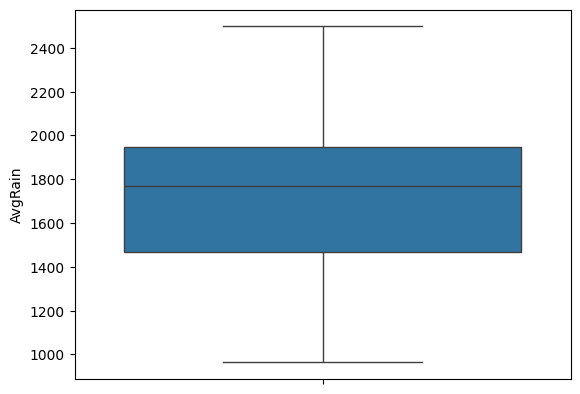

In [978]:
import seaborn as sns
sns.boxplot(complete_dataframe['AvgRain'])

<Axes: ylabel='HarvestedArea'>

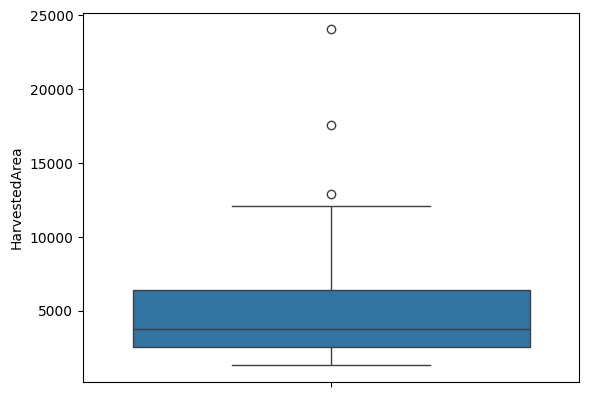

In [979]:
sns.boxplot(complete_dataframe['HarvestedArea'])

<Axes: ylabel='Productivity-per-rai'>

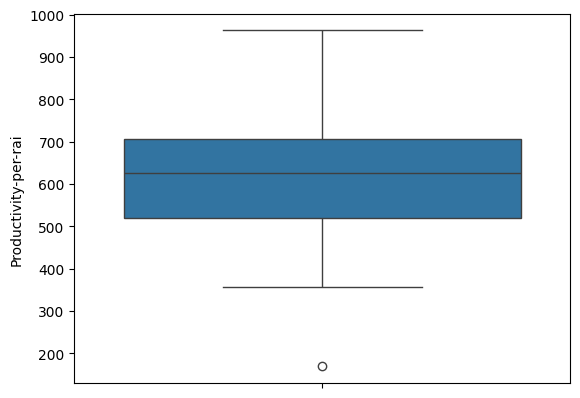

In [980]:
sns.boxplot(complete_dataframe['Productivity-per-rai'])

<Axes: ylabel='Tavg'>

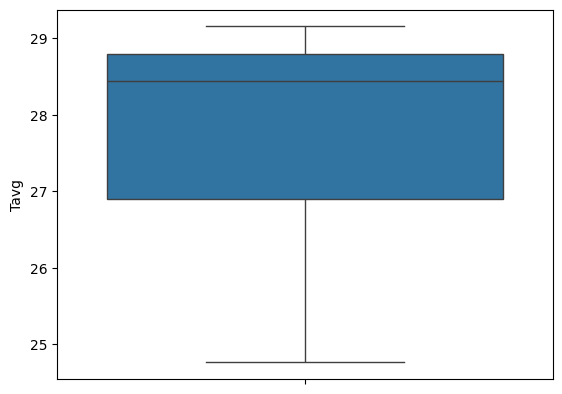

In [981]:
sns.boxplot(complete_dataframe['Tavg'])

<Axes: ylabel='Products'>

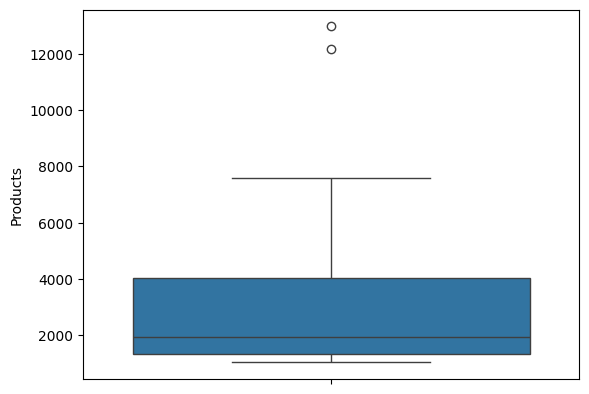

In [982]:
sns.boxplot(complete_dataframe['Products'])

## หลังกำจัด outlier

In [983]:
complete_dataframe

,AvgRain,Products,HarvestedArea,Productivity-per-rai,Humidity,Tavg
0,1328.250929,1084.0,1549.0,699.81,70.5,24.766667
2,1393.973036,1025.0,6057.0,169.23,77.7,26.800000
4,1782.377653,4247.0,5962.0,712.34,78.0,26.037500
6,2071.276268,7437.0,12889.0,577.00,81.4,28.908333
12,1758.440886,1678.0,3803.0,441.23,79.8,28.362500
15,1884.971930,1800.0,4915.0,366.23,76.5,28.791667
17,2169.486156,1638.0,3277.0,499.85,80.4,28.795833
18,2498.138976,12991.0,24057.0,540.01,819.0,27.525227
19,1001.407423,1082.0,1598.0,677.10,65.8,25.875000
21,1228.730848,2424.0,6803.0,356.31,72.5,26.995833


C:\Users\KK\AppData\Local\Temp\ipykernel_12764\3818909999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
C:\Users\KK\AppData\Local\Temp\ipykernel_12764\3768355802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='HarvestedArea'>

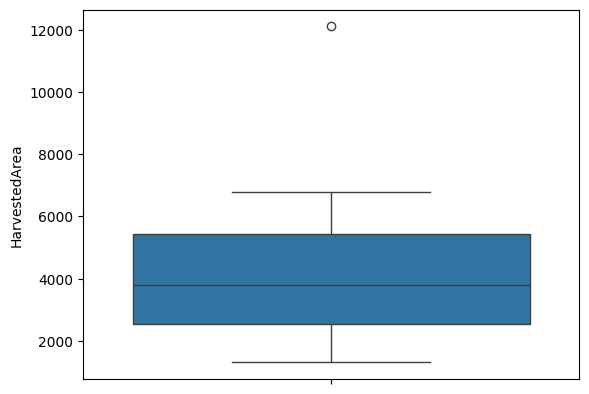

In [984]:
complete_outlier(complete_dataframe,"HarvestedArea")
sns.boxplot(complete_dataframe['HarvestedArea'])

C:\Users\KK\AppData\Local\Temp\ipykernel_12764\3818909999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
C:\Users\KK\AppData\Local\Temp\ipykernel_12764\3768355802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='Productivity-per-rai'>

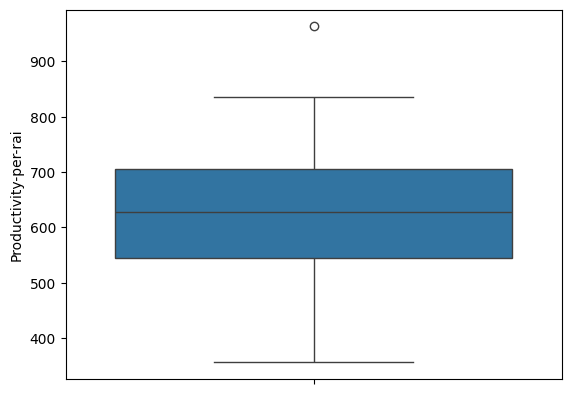

In [985]:
complete_outlier(complete_dataframe,"Productivity-per-rai")
sns.boxplot(complete_dataframe['Productivity-per-rai'])

C:\Users\KK\AppData\Local\Temp\ipykernel_12764\3818909999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
C:\Users\KK\AppData\Local\Temp\ipykernel_12764\3768355802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='Products'>

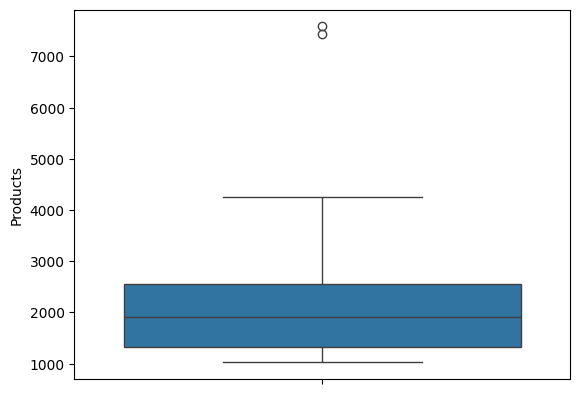

In [986]:
complete_outlier(complete_dataframe,"Products")
sns.boxplot(complete_dataframe['Products'])

# ทำการพลอตกราฟตารางทั้งหมด

<Axes: >

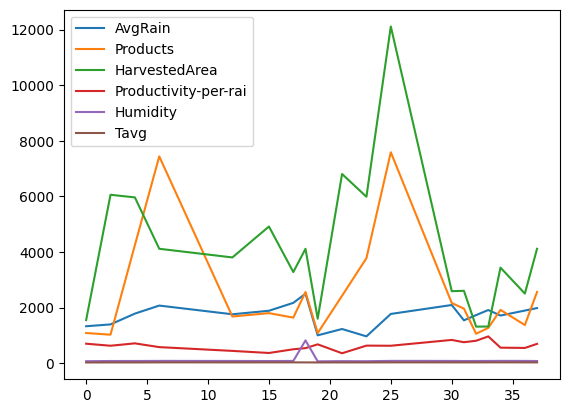

In [987]:
complete_dataframe.plot()

## plot graph โชว์ความสัมพันธ์ของแต่ละตาราง

In [988]:
import matplotlib.pyplot as plt
import seaborn as sns

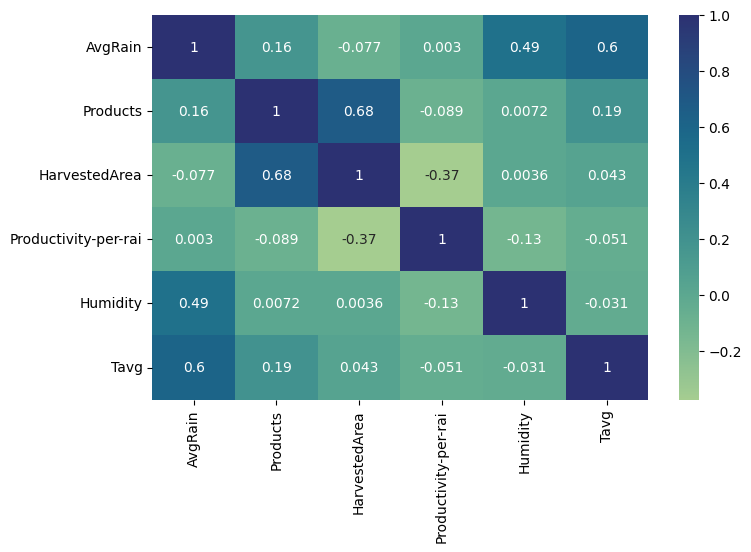

In [989]:
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(complete_dataframe.corr(), cmap="crest",annot=True)

In [990]:
# sns.pairplot(complete_dataframe,
#              kind='reg',
#              plot_kws={'line_kws': {'color': 'red'}},
#              diag_kws={'color': 'green'})

# Start Model KNN-R

## กำหนด X and Y ในการทดสอบ

In [991]:
from sklearn.model_selection import train_test_split
x = complete_dataframe[['AvgRain','HarvestedArea', 'Productivity-per-rai','Tavg',"Humidity"]]

In [992]:
y = complete_dataframe['Products']

## สร้างตัว Train และ Test

In [993]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



# ทำ Normalization ข้อมูล (Normalization Data)

In [994]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## หา K ที่ดีที่สุุด

In [995]:

# Define a range of 'k' values to test
k_values = range(1, 15)
mse_values = []  # Mean Squared Error (MSE) values

for k in k_values:
    # Create and fit the KNN regression model with the current 'k' value
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate the Mean Squared Error (MSE) for the current 'k' value
    mse = mean_squared_error(y_test, y_pred)
    
    mse_values.append(mse)

# Find the best 'k' value
best_k = k_values[mse_values.index(min(mse_values))]

d:\Python\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:458: UserWarni

## Plot ดูค่า K ที่ดีที่สุด

Best 'k' value: 12


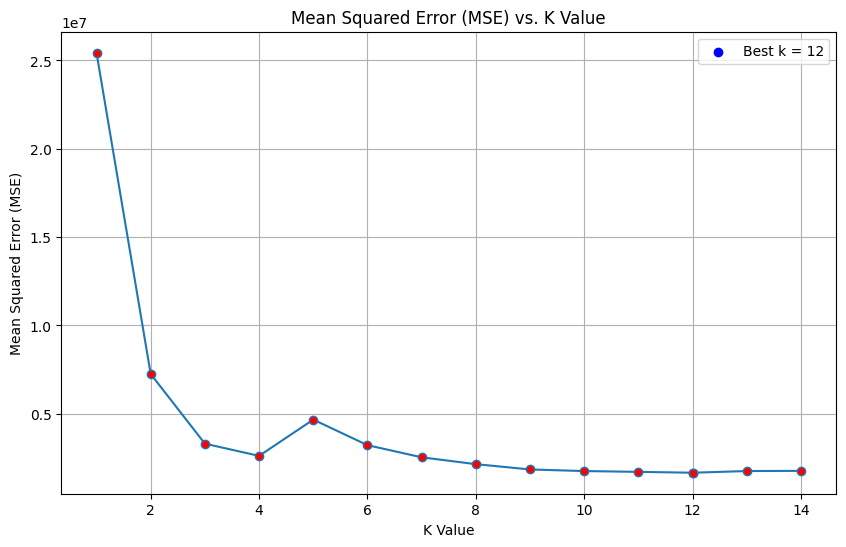

In [996]:
# Plot 'k' versus MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o',markerfacecolor='red')
plt.title("Mean Squared Error (MSE) vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)

plt.scatter(best_k, min(mse_values), color='blue', label=f'Best k = {best_k}')
plt.legend()



print("Best 'k' value:", best_k)

## กำหนด K ที่สุดให้สำหรับ model KNN-R

In [997]:
knn = KNeighborsRegressor(n_neighbors = best_k ,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=12)

In [998]:
complete_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AvgRain               19 non-null     float64
 1   Products              19 non-null     float64
 2   HarvestedArea         19 non-null     float64
 3   Productivity-per-rai  19 non-null     float64
 4   Humidity              19 non-null     float64
 5   Tavg                  19 non-null     float64
dtypes: float64(6)
memory usage: 1.0 KB


## ทำการ Predict x_test , x 

In [999]:
y_pred = knn.predict(X_test)
y_pred

array([2318.24019608, 2318.07352941, 2318.07352941, 2226.74019608])

In [1000]:
y_pred_x = knn.predict(x)
y_pred_x

array([2226.74019608, 2318.07352941, 2318.07352941, 2206.40686275,
       2206.40686275, 2318.24019608, 2226.74019608, 2221.99019608,
       2226.74019608, 2318.07352941, 2318.07352941, 2860.07352941,
       2226.74019608, 2226.74019608, 2226.74019608, 2226.74019608,
       2226.74019608, 2226.74019608, 2206.40686275])

## เก็บ Predict X ลงใน Dataframe merged_rain_rumbatan['Predict_Product_KNNR']

In [1001]:
complete_dataframe['Predict_Product_KNNR'] = knn.predict(x)
complete_dataframe

C:\Users\KK\AppData\Local\Temp\ipykernel_12764\4271837206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_dataframe['Predict_Product_KNNR'] = knn.predict(x)


,AvgRain,Products,HarvestedArea,Productivity-per-rai,Humidity,Tavg,Predict_Product_KNNR
0,1328.250929,1084.000000,1549.0,699.810000,70.5,24.766667,2226.740196
2,1393.973036,1025.000000,6057.0,626.912222,77.7,26.800000,2318.073529
4,1782.377653,4247.000000,5962.0,712.340000,78.0,26.037500,2318.073529
6,2071.276268,7437.000000,4114.0,577.000000,81.4,28.908333,2206.406863
12,1758.440886,1678.000000,3803.0,441.230000,79.8,28.362500,2206.406863
15,1884.971930,1800.000000,4915.0,366.230000,76.5,28.791667,2318.240196
17,2169.486156,1638.000000,3277.0,499.850000,80.4,28.795833,2226.740196
18,2498.138976,2559.941176,4114.0,540.010000,819.0,27.525227,2221.990196
19,1001.407423,1082.000000,1598.0,677.100000,65.8,25.875000,2226.740196
21,1228.730848,2424.000000,6803.0,356.310000,72.5,26.995833,2318.073529


In [1002]:
absolute_dis_list = abs(y_pred_x - complete_dataframe['Products'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred_x, 'real_products': complete_dataframe['Products'], 'absolute_difference': absolute_dis_list})

In [1003]:
result_df_knnr

,y_pred,real_products,absolute_difference
0,2226.740196,1084.000000,1142.740196
2,2318.073529,1025.000000,1293.073529
4,2318.073529,4247.000000,1928.926471
6,2206.406863,7437.000000,5230.593137
12,2206.406863,1678.000000,528.406863
15,2318.240196,1800.000000,518.240196
17,2226.740196,1638.000000,588.740196
18,2221.990196,2559.941176,337.950980
19,2226.740196,1082.000000,1144.740196
21,2318.073529,2424.000000,105.926471


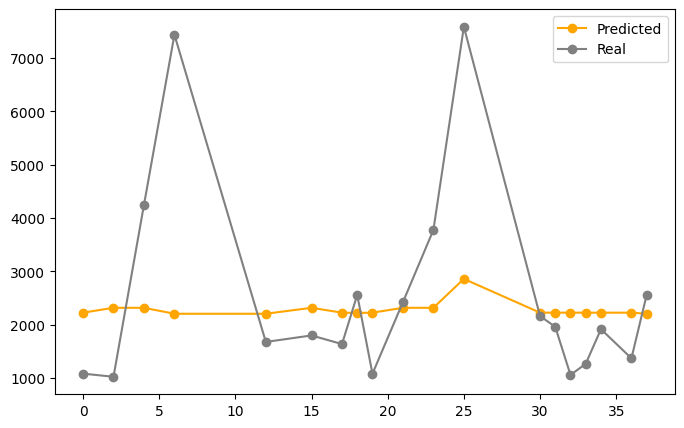

In [1004]:
plt.figure(figsize = (8, 5))
plt.plot(result_df_knnr["y_pred"], label = 'Predicted', linestyle="-", marker='o', color='orange')
plt.plot(complete_dataframe['Products'], label = 'Real', linestyle="-", marker='o', color='grey')
plt.legend()

In [1005]:
KNN_model = find_error("KNN",y_pred,y_test)

Mean absolute Error (MAE): 1268.4583333333335
Mean Squared Error (MSE): 1870353.4604719344
R-squared (R2): -1193.357489245518


# Linear regression

In [1006]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

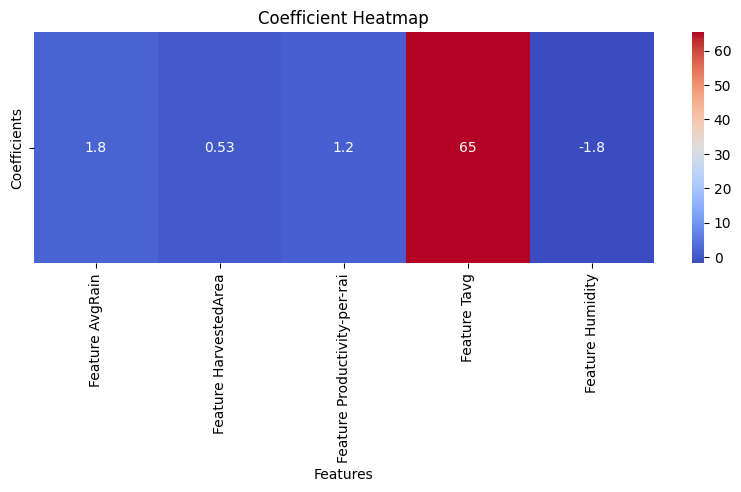

In [1007]:
# Get coefficients and feature names
coefficients = regressor.coef_
features = [f"Feature {i}" for i in x]

# Create a dataframe from coefficients and features
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Reshape coefficients for heatmap
heatmap_data = coefficients.reshape(1, -1)

# Plot heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', yticklabels=['Coefficients'], xticklabels=features)
plt.title('Coefficient Heatmap')
plt.xlabel('Features')
plt.ylabel('')
plt.show()

In [1008]:
x

,AvgRain,HarvestedArea,Productivity-per-rai,Tavg,Humidity
0,1328.250929,1549.0,699.810000,24.766667,70.5
2,1393.973036,6057.0,626.912222,26.800000,77.7
4,1782.377653,5962.0,712.340000,26.037500,78.0
6,2071.276268,4114.0,577.000000,28.908333,81.4
12,1758.440886,3803.0,441.230000,28.362500,79.8
15,1884.971930,4915.0,366.230000,28.791667,76.5
17,2169.486156,3277.0,499.850000,28.795833,80.4
18,2498.138976,4114.0,540.010000,27.525227,819.0
19,1001.407423,1598.0,677.100000,25.875000,65.8
21,1228.730848,6803.0,356.310000,26.995833,72.5


In [1009]:
y_pred = regressor.predict(X_test)
y_pred

array([3083.28957802, 2158.19636882, 3672.84654447, 1385.44970004])

In [1010]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([2317.6182927 , 2545.82450447, 7001.92062846, 2741.13922588,
       2224.7639277 , 2875.45738212, 3237.69024828,  426.29059131,
       1999.33233322, 3139.22252274, 2779.56609747, 1660.2645038 ,
       2973.6192652 ,  -82.91826171, 1916.09109129])

In [1011]:
y_pred_x = regressor.predict(x)
y_pred_x

array([ 426.29059131, 2973.6192652 , 3672.84654447, 3237.69024828,
       2317.6182927 , 3083.28957802, 2875.45738212, 2545.82450447,
        -82.91826171, 2779.56609747, 2158.19636882, 7001.92062846,
       2741.13922588, 1660.2645038 , 1385.44970004, 1916.09109129,
       2224.7639277 , 1999.33233322, 3139.22252274])

In [1012]:
absolute_dis_list = abs(y_pred_x - complete_dataframe['Products'])
result_df_linear = pd.DataFrame({'y_pred': y_pred_x, 'real_products': complete_dataframe['Products'], 'absolute_difference': absolute_dis_list})

In [1013]:
result_df_linear

,y_pred,real_products,absolute_difference
0,426.290591,1084.000000,657.709409
2,2973.619265,1025.000000,1948.619265
4,3672.846544,4247.000000,574.153456
6,3237.690248,7437.000000,4199.309752
12,2317.618293,1678.000000,639.618293
15,3083.289578,1800.000000,1283.289578
17,2875.457382,1638.000000,1237.457382
18,2545.824504,2559.941176,14.116672
19,-82.918262,1082.000000,1164.918262
21,2779.566097,2424.000000,355.566097


In [1014]:
LinearRegression_model = find_error("linearRegression",y_test,y_pred)

Mean absolute Error (MAE): 950.6740911925242
Mean Squared Error (MSE): 1175894.7336323997
R-squared (R2): 0.333232056826983


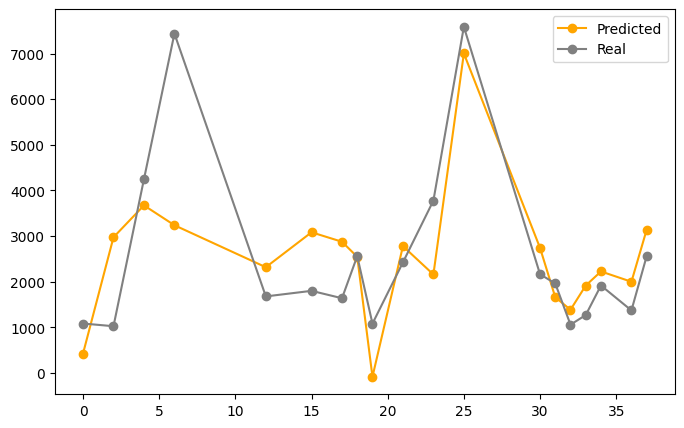

In [1015]:
plt.figure(figsize = (8, 5))
plt.plot(result_df_linear["y_pred"], label = 'Predicted', linestyle="-", marker='o', color='orange')
plt.plot(complete_dataframe['Products'], label = 'Real', linestyle="-", marker='o', color='grey')
plt.legend()

In [1016]:
result_df_linear["y_pred"]

0      426.290591
2     2973.619265
4     3672.846544
6     3237.690248
12    2317.618293
15    3083.289578
17    2875.457382
18    2545.824504
19     -82.918262
21    2779.566097
23    2158.196369
25    7001.920628
30    2741.139226
31    1660.264504
32    1385.449700
33    1916.091091
34    2224.763928
36    1999.332333
37    3139.222523
Name: y_pred, dtype: float64

In [1017]:
result_df_knnr["real_products"]

0     1084.000000
2     1025.000000
4     4247.000000
6     7437.000000
12    1678.000000
15    1800.000000
17    1638.000000
18    2559.941176
19    1082.000000
21    2424.000000
23    3777.000000
25    7586.000000
30    2164.000000
31    1961.000000
32    1059.000000
33    1269.000000
34    1917.000000
36    1371.000000
37    2559.941176
Name: real_products, dtype: float64

In [1018]:
compare_KNN_Liner = result_df_knnr.merge(result_df_linear,on="real_products",how="left")

In [1019]:
compare_KNN_Liner.rename(columns={"y_pred_x":"KNN",
                                  "absolute_difference_x":"difference_KNN",
                                  "y_pred_y":"LinearRegression",
                                  "absolute_difference_y":"difference_LinearRegression"},inplace=True)

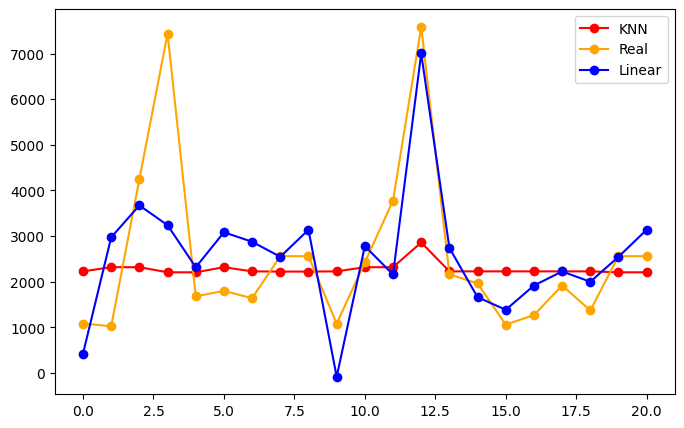

In [1020]:
plt.figure(figsize = (8, 5))
plt.plot(compare_KNN_Liner['KNN'], label = 'KNN', linestyle="-", marker='o', color='red') # KNNR
plt.plot(compare_KNN_Liner['real_products'], label = 'Real', linestyle="-", marker='o', color='orange') # Reals
plt.plot(compare_KNN_Liner['LinearRegression'], label = 'Linear', linestyle="-", marker='o', color='blue') # LinearR
plt.legend()

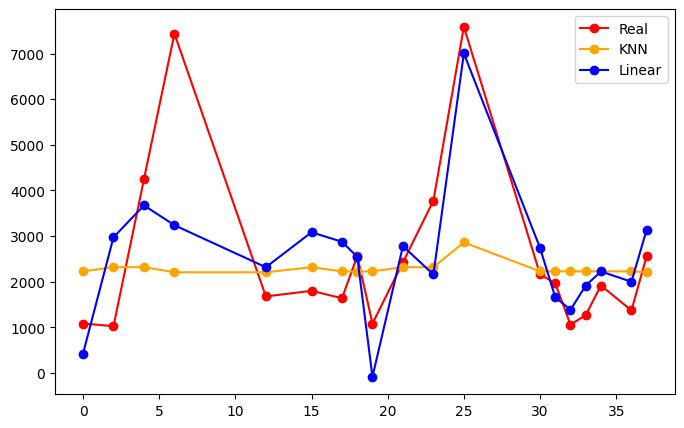

In [1021]:
plt.figure(figsize = (8, 5))
plt.plot(complete_dataframe['Products'], label = 'Real', linestyle="-", marker='o', color='red') # Real Y
plt.plot(result_df_knnr['y_pred'], label = 'KNN', linestyle="-", marker='o', color='orange') # KNNR
plt.plot(result_df_linear['y_pred'], label = 'Linear', linestyle="-", marker='o', color='blue') # LinearR

plt.legend()